In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statwrap
import matplotlib.colors as mcolors
np.random.seed(1)
%use_fpp

In [2]:
p = .20

# prob histogram
fig, ax = plt.subplots()
ax.bar([0,1], [1-p,p],
        width = 1,
       ec = 'black')
ax.set_xticks([0,1])
ax.set_yticks([0,.2,.4,.6,.8])
plt.close()

In [3]:
# make 100 data sets and sort from lowest mean to highest mean
n = 100 # size of each sample

all_data = [stats.bernoulli.rvs(p=p, size = n) for i in range(100)]
all_data = sorted(all_data, key = lambda x: np.mean(x))

datas = pd.Series(all_data).rename("data")
means = pd.Series([np.mean(x) for x in all_data]).rename("phat")


max_diff = np.max([means.max() - p, p - means.min()])
x_range = [p - max_diff - 10**-5, p + max_diff + 10**-5]

cats = pd.cut(means, np.linspace(*x_range,10)).rename("interval")
codes = cats.cat.codes.rename("codes")

df = means.to_frame().join(cats).join(datas).join(codes)
n_cats = len(cats.cat.categories)
max_cat_freq = cats.value_counts().max()


selambda = lambda x: np.sqrt(x*(1-x)/100)
df['se'] = df.phat.apply(selambda)
def containsp(phat):
    se = selambda(phat)
    a = p >= phat - 1.96*se
    b = p <= phat + 1.96*se
    return 1*(a and b)
df['ci_covers'] = df['phat'].apply(containsp)

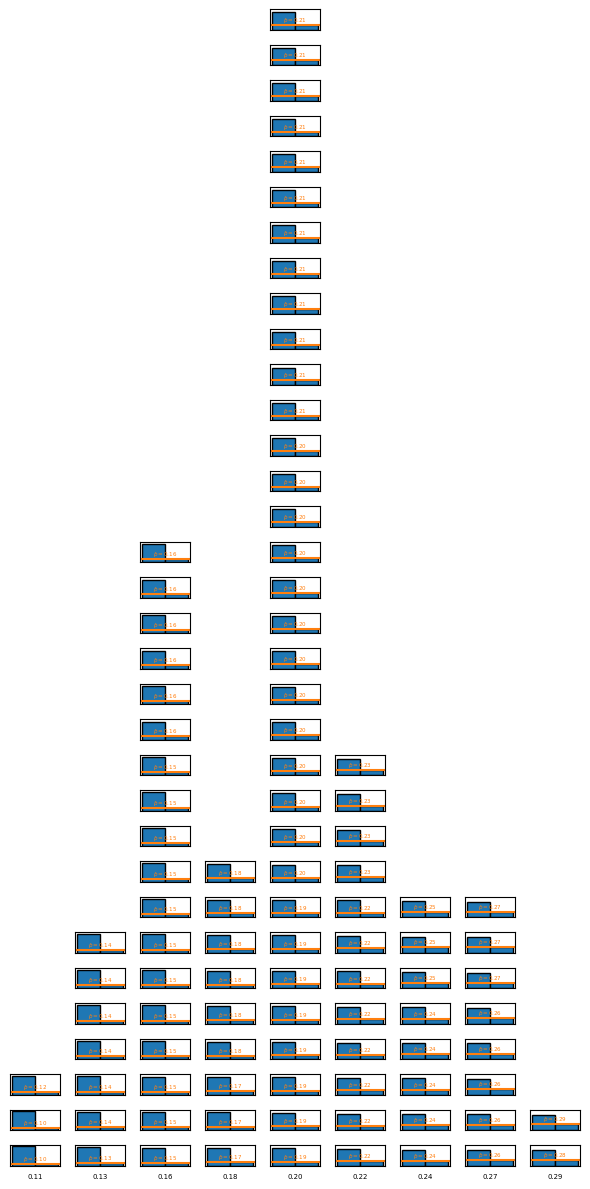

In [4]:
fig, axs = plt.subplots(max_cat_freq,
                        n_cats,
                       sharex=True,
                       sharey=True,
                       figsize=(6,12))


for i in range(n_cats):
    col = axs[:,i]
    
    category = cats.cat.categories[i]
    midpoint = .5*category.left + 0.5*category.right
    
    ax = col[-1]
    ax.text(0.5, 0,
            s = "\n" + f"{midpoint:.2f}",
            va = 'top',
            ha = 'center',
            size = 5,
           transform = ax.transAxes)
    
    temp = df[df.codes == i]
    samples = temp['data']
    if len(samples)==0:
        for ax in col:
            ax.axis('off')
            
    else:
        for k, sample in enumerate(samples):
            ax = col[-1-k]
            histogram(sample,
                      ax=ax,
                      class_intervals = [-0.5,0.5,1.5],
                      show=False)
            phat = np.mean(sample)
            ax.axhline(phat, color = 'C1')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.text(0.5,phat,
                   s = r'$\hat{p}=$'+f"{phat:.2f}",
                   ha = 'center',
                   va = 'bottom',
                   color = 'C1',
                   size = 4)

        # remove axes the continue up within the column
        for l in range(k+1,len(col)):
            ax = col[-1-l]
            ax.axis('off')


plt.tight_layout()
plt.savefig("../book/images/bernoulliCLT.svg", transparent=True)

### confidence intervals

In [5]:
green = mcolors.to_rgb("C2")
s = .9
green = s*np.ones(3) + (1-s)*np.array(green)

orange = mcolors.to_rgb("C1")
s = .8
orange = s*np.ones(3) + (1-s)*np.array(orange)

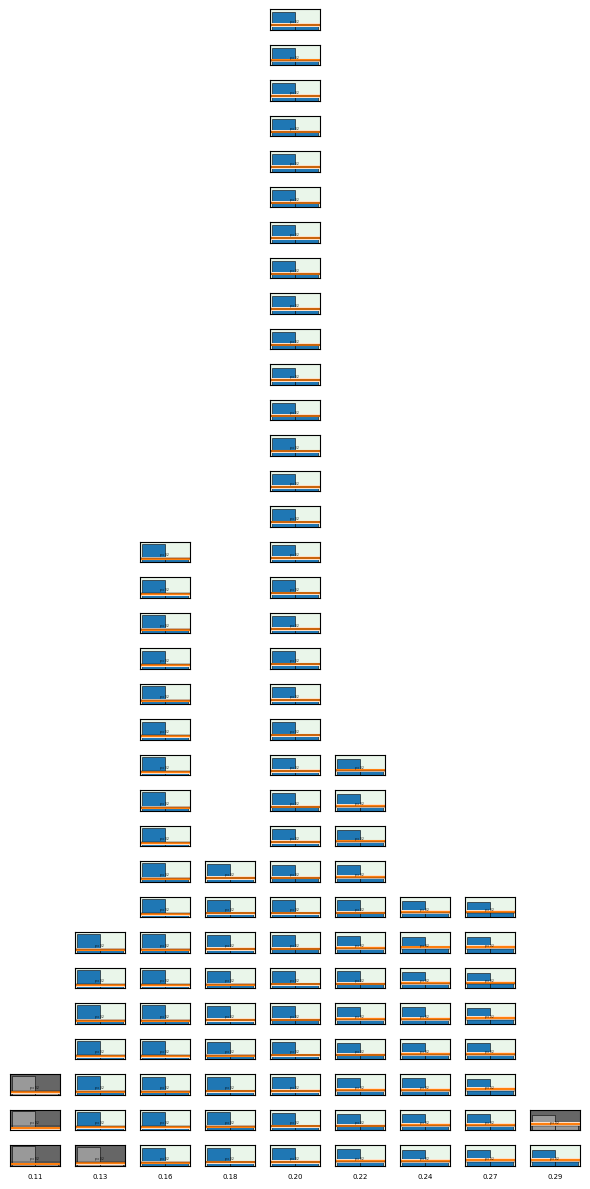

In [6]:
fig, axs = plt.subplots(max_cat_freq,
                        n_cats,
                       sharex=True,
                       sharey=True,
                       figsize=(6,12))


for i in range(n_cats):
    col = axs[:,i]
    
    category = cats.cat.categories[i]
    midpoint = .5*category.left + 0.5*category.right
    
    ax = col[-1]
    ax.text(0.5, 0,
            s = "\n" + f"{midpoint:.2f}",
            va = 'top',
            ha = 'center',
            size = 5,
           transform = ax.transAxes)
    
    temp = df[df.codes == i]
    samples = temp['data']
    if len(samples)==0:
        for ax in col:
            ax.axis('off')
            
    else:
        for k, sample in enumerate(samples):
            ax = col[-1-k]
            phat = np.mean(sample)
            se = selambda(phat)
            covers = containsp(phat)
            color = 'C0' if covers else (.6, .6, .6)
            
            histogram(sample,
                      ax=ax,
                      class_intervals = [-0.5,0.5,1.5],
                      show=False,
                     fc = color,
                     lw = 0.4)
            ax.axhline(phat, color = 'C1')
            ax.set_xticks([])
            ax.set_yticks([])
            
            ax.axhline(0.2, color = 'black', lw = 0.3)
            #ax.axhline(phat, color = 'C1')
            ax.axhspan(phat-1.96*se, phat+1.96*se,
                       fc = orange,
                      ec = None,
                      lw = 0)
            
            # Annotations
            ax.text(0.5,p,
                   s = r'$p=$'+f"{p:.1f}",
                   ha = 'center',
                   va = 'bottom',
                   color = 'black',
                   size = 2)
            #ax.text(0.5,phat,
            #       s = r'$\hat{p}=$'+f"{phat:.2f}",
            #       ha = 'center',
            #       va = 'bottom',
            #       color = 'C1',
            #       size = 4)
            
            if not covers:
                ax.set_fc(np.ones(3)*.4)
            else:
                ax.set_fc(green)

        # remove axes the continue up within the column
        for l in range(k+1,len(col)):
            ax = col[-1-l]
            ax.axis('off')


plt.tight_layout()
plt.savefig("../book/images/bernoulliCLTwCI.svg", transparent=False)

# Repeat with more draws

In [7]:
# make 100 data sets and sort from lowest mean to highest mean
n = 400 # size of each sample

all_data = [stats.bernoulli.rvs(p=p, size = n) for i in range(100)]
all_data = sorted(all_data, key = lambda x: np.mean(x))

datas = pd.Series(all_data).rename("data")
means = pd.Series([np.mean(x) for x in all_data]).rename("phat")


#max_diff = np.max([means.max() - p, p - means.min()])
#x_range = [p - max_diff - 10**-5, p + max_diff + 10**-5]

cats = pd.cut(means, np.linspace(*x_range,10)).rename("interval")
codes = cats.cat.codes.rename("codes")

df = means.to_frame().join(cats).join(datas).join(codes)
n_cats = len(cats.cat.categories)
max_cat_freq = cats.value_counts().max()


selambda = lambda x: np.sqrt(x*(1-x)/n)
def containsp(phat):
    se = selambda(phat)
    a = p >= phat - 1.96*se
    b = p <= phat + 1.96*se
    return 1*(a and b)

In [ ]:
fig, axs = plt.subplots(max_cat_freq,
                        n_cats,
                       sharex=True,
                       sharey=True,
                       figsize=(6,15))

for i in range(n_cats):
    col = axs[:,i]
    
    category = cats.cat.categories[i]
    midpoint = .5*category.left + 0.5*category.right
    
    ax = col[-1]
    ax.text(0.5, 0,
            s = "\n" + f"{midpoint:.2f}",
            va = 'top',
            ha = 'center',
            size = 5,
           transform = ax.transAxes)
    
    temp = df[df.codes == i]
    samples = temp['data']
    if len(samples)==0:
        for ax in col:
            ax.axis('off')
            
    else:
        for k, sample in enumerate(samples):
            ax = col[-1-k]
            histogram(sample,
                      ax=ax,
                      class_intervals = [-0.5,0.5,1.5],
                      show=False)
            phat = np.mean(sample)
            ax.axhline(phat, color = 'C1')
            ax.tick_params(labelsize=3)
            
            ax.set_yticks([])
            ax.set_xticks([])
            ax.text(0.5,phat,
                   s = r'$\hat{p}=$'+f"{phat:.3f}",
                   ha = 'center',
                   va = 'bottom',
                   color = 'C1',
                   size = 4)

        # remove axes the continue up within the column
        for l in range(k+1,len(col)):
            ax = col[-1-l]
            ax.axis('off')

plt.tight_layout()
plt.savefig("../book/images/bernoulliCLT2.svg", transparent=True)

In [ ]:
# SEs
np.sqrt(p*(1-p)/100), np.sqrt(400*p*(1-p)/100)

#### confidence intervals

In [ ]:
fig, axs = plt.subplots(max_cat_freq,
                        n_cats,
                       sharex=True,
                       sharey=True,
                       figsize=(6,15))

for i in range(n_cats):
    col = axs[:,i]
    
    category = cats.cat.categories[i]
    midpoint = .5*category.left + 0.5*category.right
    
    ax = col[-1]
    ax.text(0.5, 0,
            s = "\n" + f"{midpoint:.2f}",
            va = 'top',
            ha = 'center',
            size = 5,
           transform = ax.transAxes)
    
    temp = df[df.codes == i]
    samples = temp['data']
    if len(samples)==0:
        for ax in col:
            ax.axis('off')
            
    else:
        for k, sample in enumerate(samples):
            ax = col[-1-k]
            phat = np.mean(sample)
            se = selambda(phat)
            covers = containsp(phat)
            color = 'C0' if covers else (.6, .6, .6)
            
            histogram(sample,
                      ax=ax,
                      class_intervals = [-0.5,0.5,1.5],
                      show=False,
                     fc = color,
                     lw = 0.4)

            ax.set_xticks([])
            ax.set_yticks([])
            ax.axhline(0.2, color = 'black', lw = 0.3)
            #ax.axhline(phat, color = 'C1')
            ax.axhspan(phat-1.96*se, phat+1.96*se,
                       fc = orange,
                      ec = None,
                      lw = 0)
            
            # Annotations
            ax.text(0.5,p,
                   s = r'$p=$'+f"{p:.1f}",
                   ha = 'center',
                   va = 'bottom',
                   color = 'black',
                   size = 2)
            #ax.text(0.5,phat,
            #       s = r'$\hat{p}=$'+f"{phat:.2f}",
            #       ha = 'center',
            #       va = 'bottom',
            #       color = 'C1',
            #       size = 4)
            
            if not covers:
                ax.set_fc(np.ones(3)*.4)
            else:
                ax.set_fc(green)

        # remove axes the continue up within the column
        for l in range(k+1,len(col)):
            ax = col[-1-l]
            ax.axis('off')


plt.tight_layout()
fig.savefig("../book/images/bernoulliCLT2wCI.svg", transparent=False)